# Project: Investigating Medical Appointments Data In Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This report aims to analyze a data set that is related to people who do and do not show up for their medical apointments in Brazil. In particular, we will be interested in finding trends among people who showed up for thier appointments and how they differ from who did not show up. we will utilize pandas, numpy, as well as matplotlib to answer the following questions:

- Do older people miss their appointments more frequently than younger people?
- Do women show up for their appointments more frequently than men?
- Do people who recevied an SMS messege tend to show up? 



In [1]:
import pandas as pd            #importing packeges
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:
# reading and presenting the file head
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
df.shape #rows, columns

(110527, 14)

In [10]:
df.describe() #summury statistics

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
df.nunique() #how many unique values in each column?

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [12]:
df.info() #looking for Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


It appears that no Null values exist in our data set. Moreover, since the patient ID as well as the appointment ID will not affect the analysis of our data, they can be dropped to ease the investigation.

In [13]:
#droping unnecessery information
df.drop(['PatientId' , 'AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


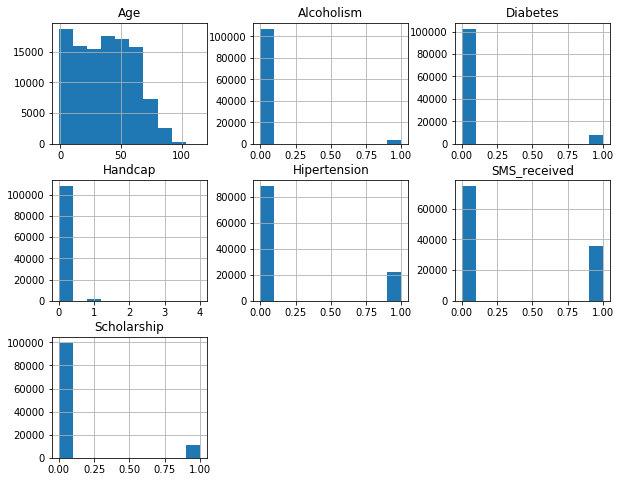

In [14]:
df.hist(figsize=(10,8));
#visualizing the data

From the histograms, it appears that only few values from the data set are either Handcap or Alcoholism. And the age histogram is approximately uniform.


### Data Cleaning: Checking for Duplicates and Outliers

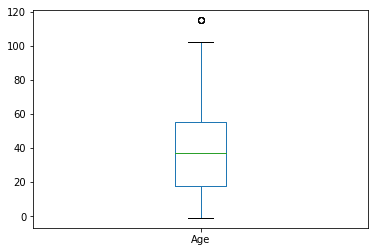

In [15]:
#looking for outliers in age
df['Age'].plot(kind='box');

In terms of outliers, age has only one out of 100K, therefore, dropping it from the data set is out of no practical concerns.

In [16]:
sum(df.duplicated()) #repeated values

635

We need to drop those 635 duplicates to facilitate the process.

In [17]:
df.drop_duplicates(inplace=True) #dropping repeated values
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 

### Do older people miss their medical appointments more frequently than younger people?

First let us divide the age in this data into two groups; high_age and low_age based on the median value of the age and then count the number of people who did not show up in each groupe to answer the question. 

In [18]:
med=df["Age"].median() #finding the age median
med

37.0

In [19]:
low_age = df.query('Age < 37') #creating groupe for low age data and high age
high_age = df.query('Age>=37')

In [20]:
#Making sure that the two groupes are created succefully

num_samples = df.shape[0]
num_samples == low_age['No-show'].count() + high_age['No-show'].count()

True

In [21]:
#do younger people miss their appointments more frequently?
low_aged= sum(low_age['No-show']== 'Yes') / low_age['No-show'].count()
print(low_aged)

high_aged = sum(high_age['No-show']== 'Yes') / high_age['No-show'].count()
high_aged

0.227245917351716


0.17558143714727345

As shown, 23% of younger people missed their appointments whereas 18% of older people did. Thus, younger people (who aged less than 37) tend to miss their appointments more frequently than older people.

### Research Question 2 

### Do women miss their medical appointments more frequently than men?

To answer this question we will find the ratio of women who attended their medical appointments to the overall number of women (as done for first question) and will compare the result with that for men.

In [22]:
#start by creating two groupes for men and women
women= df[df['Gender'] == 'F']
men= df[df['Gender'] == 'M']
women.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


In [23]:
#Do women miis more as a percentage?
women_perc = sum(women['No-show']== 'Yes') / women['No-show'].count()
print(women_perc)

men_perc = sum(men['No-show']== 'Yes') / men['No-show'].count()
men_perc

0.2024027892518588


0.19864847303443794

As shown above, both percentages are quite the same. Therfore, we can say that the gender variable is not related to wether a person did or did not attend their medical appointment. 

### Research Question 3

### Does Receiving an SMS Meessege Affect Attendence?

Let us seperate people itno two groupes:
who received & who did not.

In [24]:
#creating two groupes
did_rec=df[df['SMS_received'] == 1]
did_not=df[df['SMS_received'] == 0]
did_rec.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
11,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
15,F,2016-04-26T08:47:27Z,2016-04-29T00:00:00Z,15,NOVA PALESTINA,0,0,0,0,0,1,No
18,F,2016-04-26T10:54:18Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,1,0,0,0,0,1,No
22,M,2016-04-25T13:29:16Z,2016-04-29T00:00:00Z,13,CONQUISTA,0,0,0,0,0,1,Yes
25,M,2016-04-26T15:04:17Z,2016-04-29T00:00:00Z,46,CONQUISTA,0,1,0,0,0,1,No


In [25]:
#comparing the two percentages
received = sum(did_rec['No-show']== 'Yes') / did_rec['No-show'].count()
print(received)

received_not = sum(did_not['No-show']== 'Yes') / did_not['No-show'].count()
received_not

0.27574544839637


0.16548850960892353

What a result! people who received an SMS messege tend to miss their medical appointments. It shows that 28% of who received an SMS messege did not show up, while only 17% of who did not recevied an SMS messege did not show up.

Let us visualize the answers of our questions:

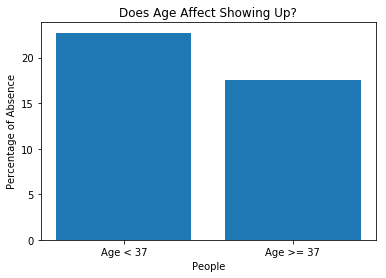

In [26]:
#ploting the two groupes that we have created about Age
plt.bar([1, 2], [100*low_aged, 100*high_aged], tick_label=['Age < 37', 'Age >= 37']);
plt.title('Does Age Affect Showing Up?')
plt.xlabel('People')
plt.ylabel('Percentage of Absence');


It is clear now that younger people tend to miss more.

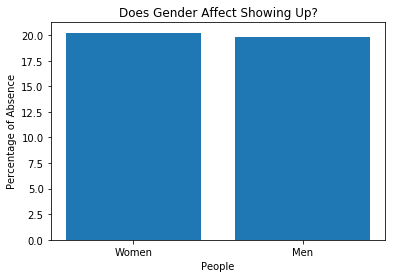

In [27]:
#plotting the result about gender
plt.bar([1, 2], [100*women_perc, 100*men_perc], tick_label=['Women', 'Men']);
plt.title('Does Gender Affect Showing Up?')
plt.xlabel('People')
plt.ylabel('Percentage of Absence');

From above visualisation, it is clear that both have the same percentage which indicate that the gender has nothing to do with showing up.

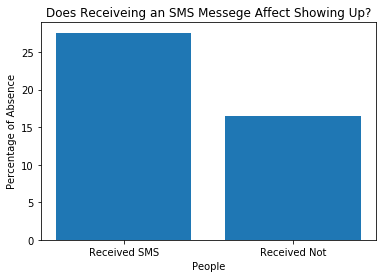

In [28]:
#plottung the result for SMS messeges
plt.bar([1, 2], [100*received, 100*received_not], tick_label=['Received SMS', 'Received Not']);
plt.title('Does Receiveing an SMS Messege Affect Showing Up?')
plt.xlabel('People')
plt.ylabel('Percentage of Absence');

Unexpectedly, people who received SMS messeges tend to miss their appointments more frequently than who received!

<a id='conclusions'></a>
## Conclusions

To conclude, we have invistigate the data to find how the three independent variables (Gender, Receiving SMS, and Age) affect the dependent variable (showing up). The result of our investigation can be summurised as follows:

>1- People with age less than 37 tend to miss their appointements.

>2- The gender does not affect wether a person may show or show not.

>3- Receving an SMS messege tend to be not helpful for decreasing the number of people who did not show up.

